<a href="https://colab.research.google.com/github/KEMAL-MUDIE/KEMAL-MUDIE/blob/main/image%20proce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from keras import layers
import keras

In [ ]:
%%capture
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

2


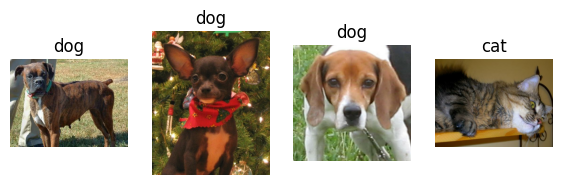

In [ ]:
get_label_name = metadata.features['label'].int2str
train_iter = iter(train_ds)
fig = plt.figure(figsize=(7, 8))
for x in range(4):
  image, label = next(train_iter)
  fig.add_subplot(1, 4, x+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(get_label_name(label));



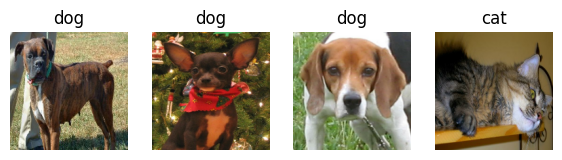

In [ ]:
resize_and_rescale = keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
  ])


get_label_name = metadata.features['label'].int2str
train_iter = iter(train_ds)
fig = plt.figure(figsize=(7, 8))
for x in range(4):
  image, label = next(train_iter)
  fig.add_subplot(1, 4, x+1)

  IMG_SIZE = 180

  result = resize_and_rescale(image)
  plt.axis('off')
  plt.imshow(result);
  plt.title(get_label_name(label));

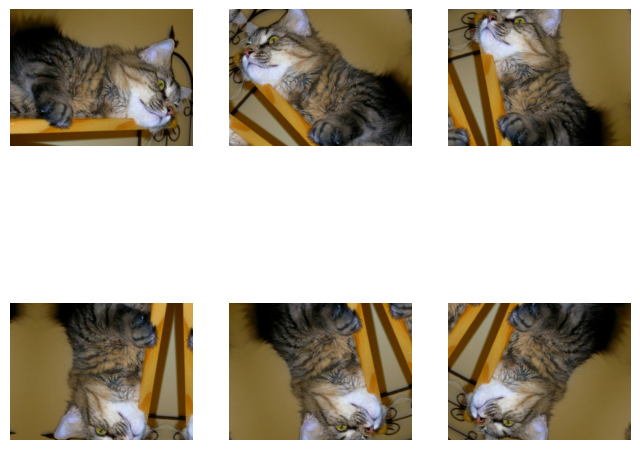

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4),
])


plt.figure(figsize=(8, 7))
for i in range(6):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(augmented_image.numpy()/255)
  plt.axis("off")

In [ ]:
model = keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  # Add the model layers
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

In [ ]:
aug_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
aug_ds

<_MapDataset element_spec=(TensorSpec(shape=(180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
aug_ds = train_ds.map(lambda x, y: (resize_and_rescale(x, training=True), y))

In [ ]:
aug_ds

<_MapDataset element_spec=(TensorSpec(shape=(180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)


train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(180,180,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

epochs=1
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

582/582 [==============================] - 102s 156ms/step - loss: 0.6944 - accuracy: 0.4961 - val_loss: 0.7295 - val_accuracy: 0.5185


In [ ]:
loss, acc = model.evaluate(test_ds)

73/73 [==============================] - 3s 47ms/step - loss: 0.7183 - accuracy: 0.5013


# cats_vs_dogs dataset

In [ ]:
%%capture
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

(-0.5, 349.5, 261.5, -0.5)

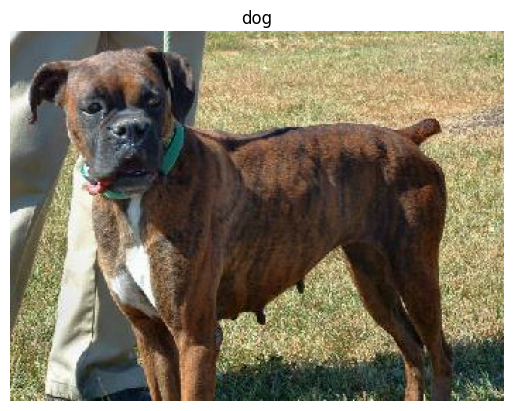

In [ ]:
image, label = next(iter(train_ds))
plt.imshow(image)
plt.title(get_label_name(label));
plt.axis("off")

In [ ]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

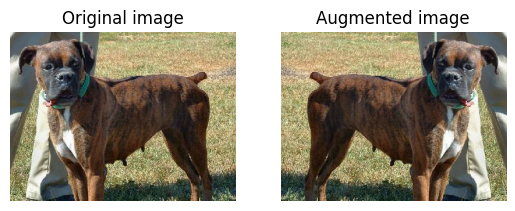

In [ ]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

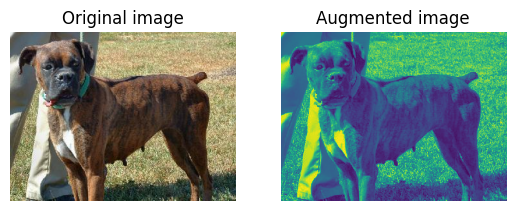

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image,  tf.squeeze(grayscaled))

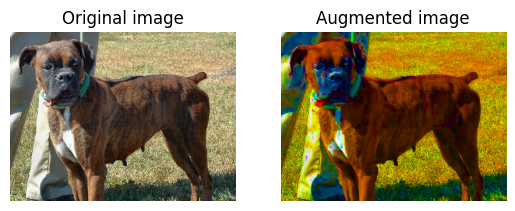

In [ ]:
saturated = tf.image.adjust_saturation(image, 12)
visualize(image, saturated)

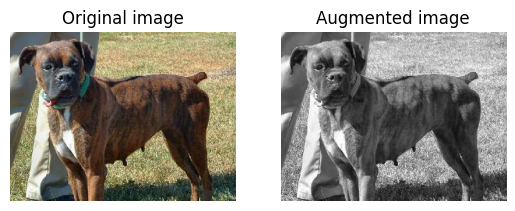

In [ ]:
saturated = tf.image.adjust_saturation(image, -12)
visualize(image, saturated)

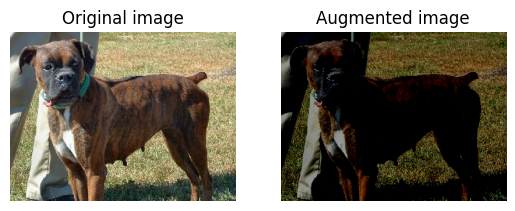

In [ ]:
bright = tf.image.adjust_brightness(image, -0.4)
visualize(image, bright)

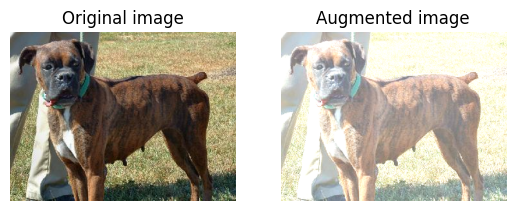

In [ ]:
bright = tf.image.adjust_brightness(image, 0.44)
visualize(image, bright)

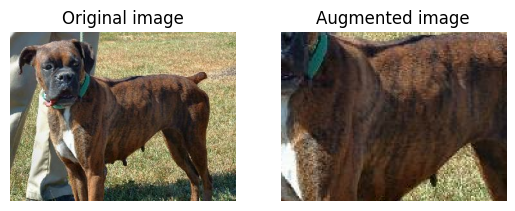

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

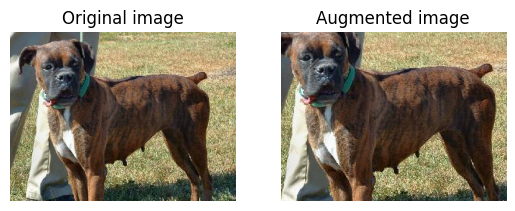

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.85)
visualize(image, cropped)

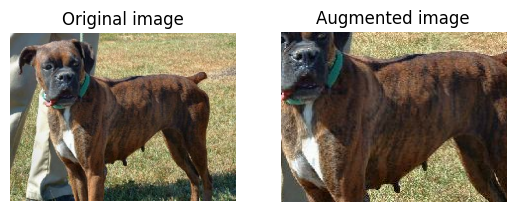

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.65)
visualize(image, cropped)

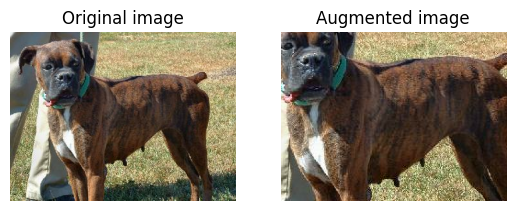

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.7)
visualize(image, cropped)

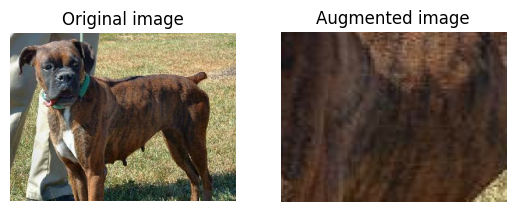

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.3)
visualize(image, cropped)

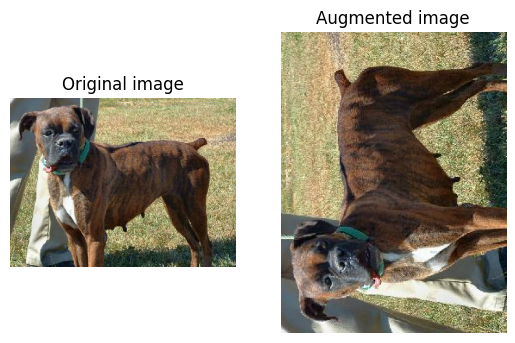

In [ ]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

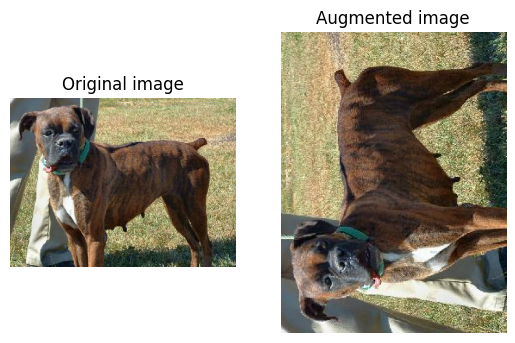

In [ ]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

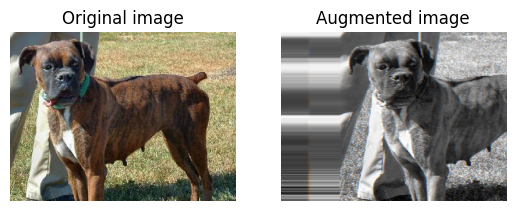

In [ ]:
rotated = tf.keras.preprocessing.image.random_rotation(image, 90)
visualize(image, rotated)

In [ ]:
# tf.keras.preprocessing.image.save_img(image,)

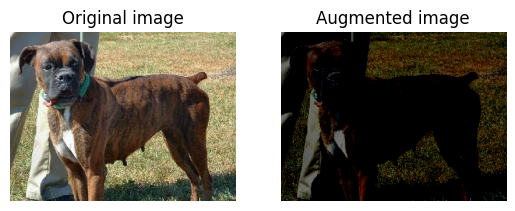

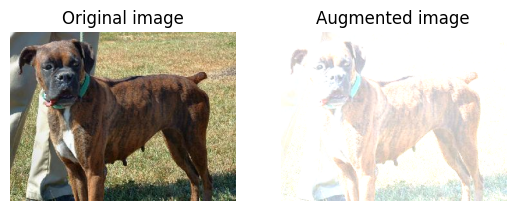

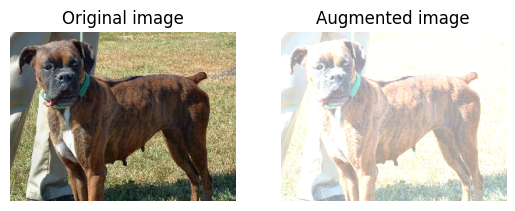

In [ ]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.94, seed=seed)
  visualize(image, stateless_random_brightness)

In [ ]:
def augment(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
  image = tf.image.random_brightness(image, max_delta=0.5)
  return image, label


train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

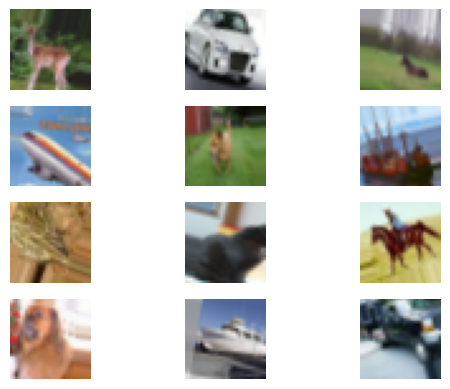

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(x_train)

for X_batch, y_batch in datagen.flow(x_train,y_train, batch_size=12):
    for i in range(0, 12):
        plt.subplot(4,3,i+1)
        plt.imshow(X_batch[i]/255)
        plt.axis('off')
    break

In [ ]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

albumentations==1.3.1 is successfully installed


In [ ]:
# necessary imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from functools import partial
from albumentations import (
    Compose, RandomBrightness, JpegCompression, HueSaturationValue, RandomContrast, HorizontalFlip,
    Rotate
)
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
data, info= tfds.load(name="tf_flowers", split="train", as_supervised=True, with_info=True)
data

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
def process_image(image, label, img_size):
    # cast and normalize image
    image = tf.image.convert_image_dtype(image, tf.float32)
    # apply simple augmentations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.resize(image,[img_size, img_size])
    return image, label

ds_tf = data.map(partial(process_image, img_size=120), num_parallel_calls=AUTOTUNE).batch(30).prefetch(AUTOTUNE)
ds_tf

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
def view_image(ds):
    image, label = next(iter(ds)) # extract 1 batch from the dataset
    image = image.numpy()
    label = label.numpy()

    fig = plt.figure(figsize=(22, 22))
    for i in range(20):
        ax = fig.add_subplot(4, 5, i+1)
        ax.imshow(image[i])
        ax.set_title(f"Label: {label[i]}")
        ax.axis("off")

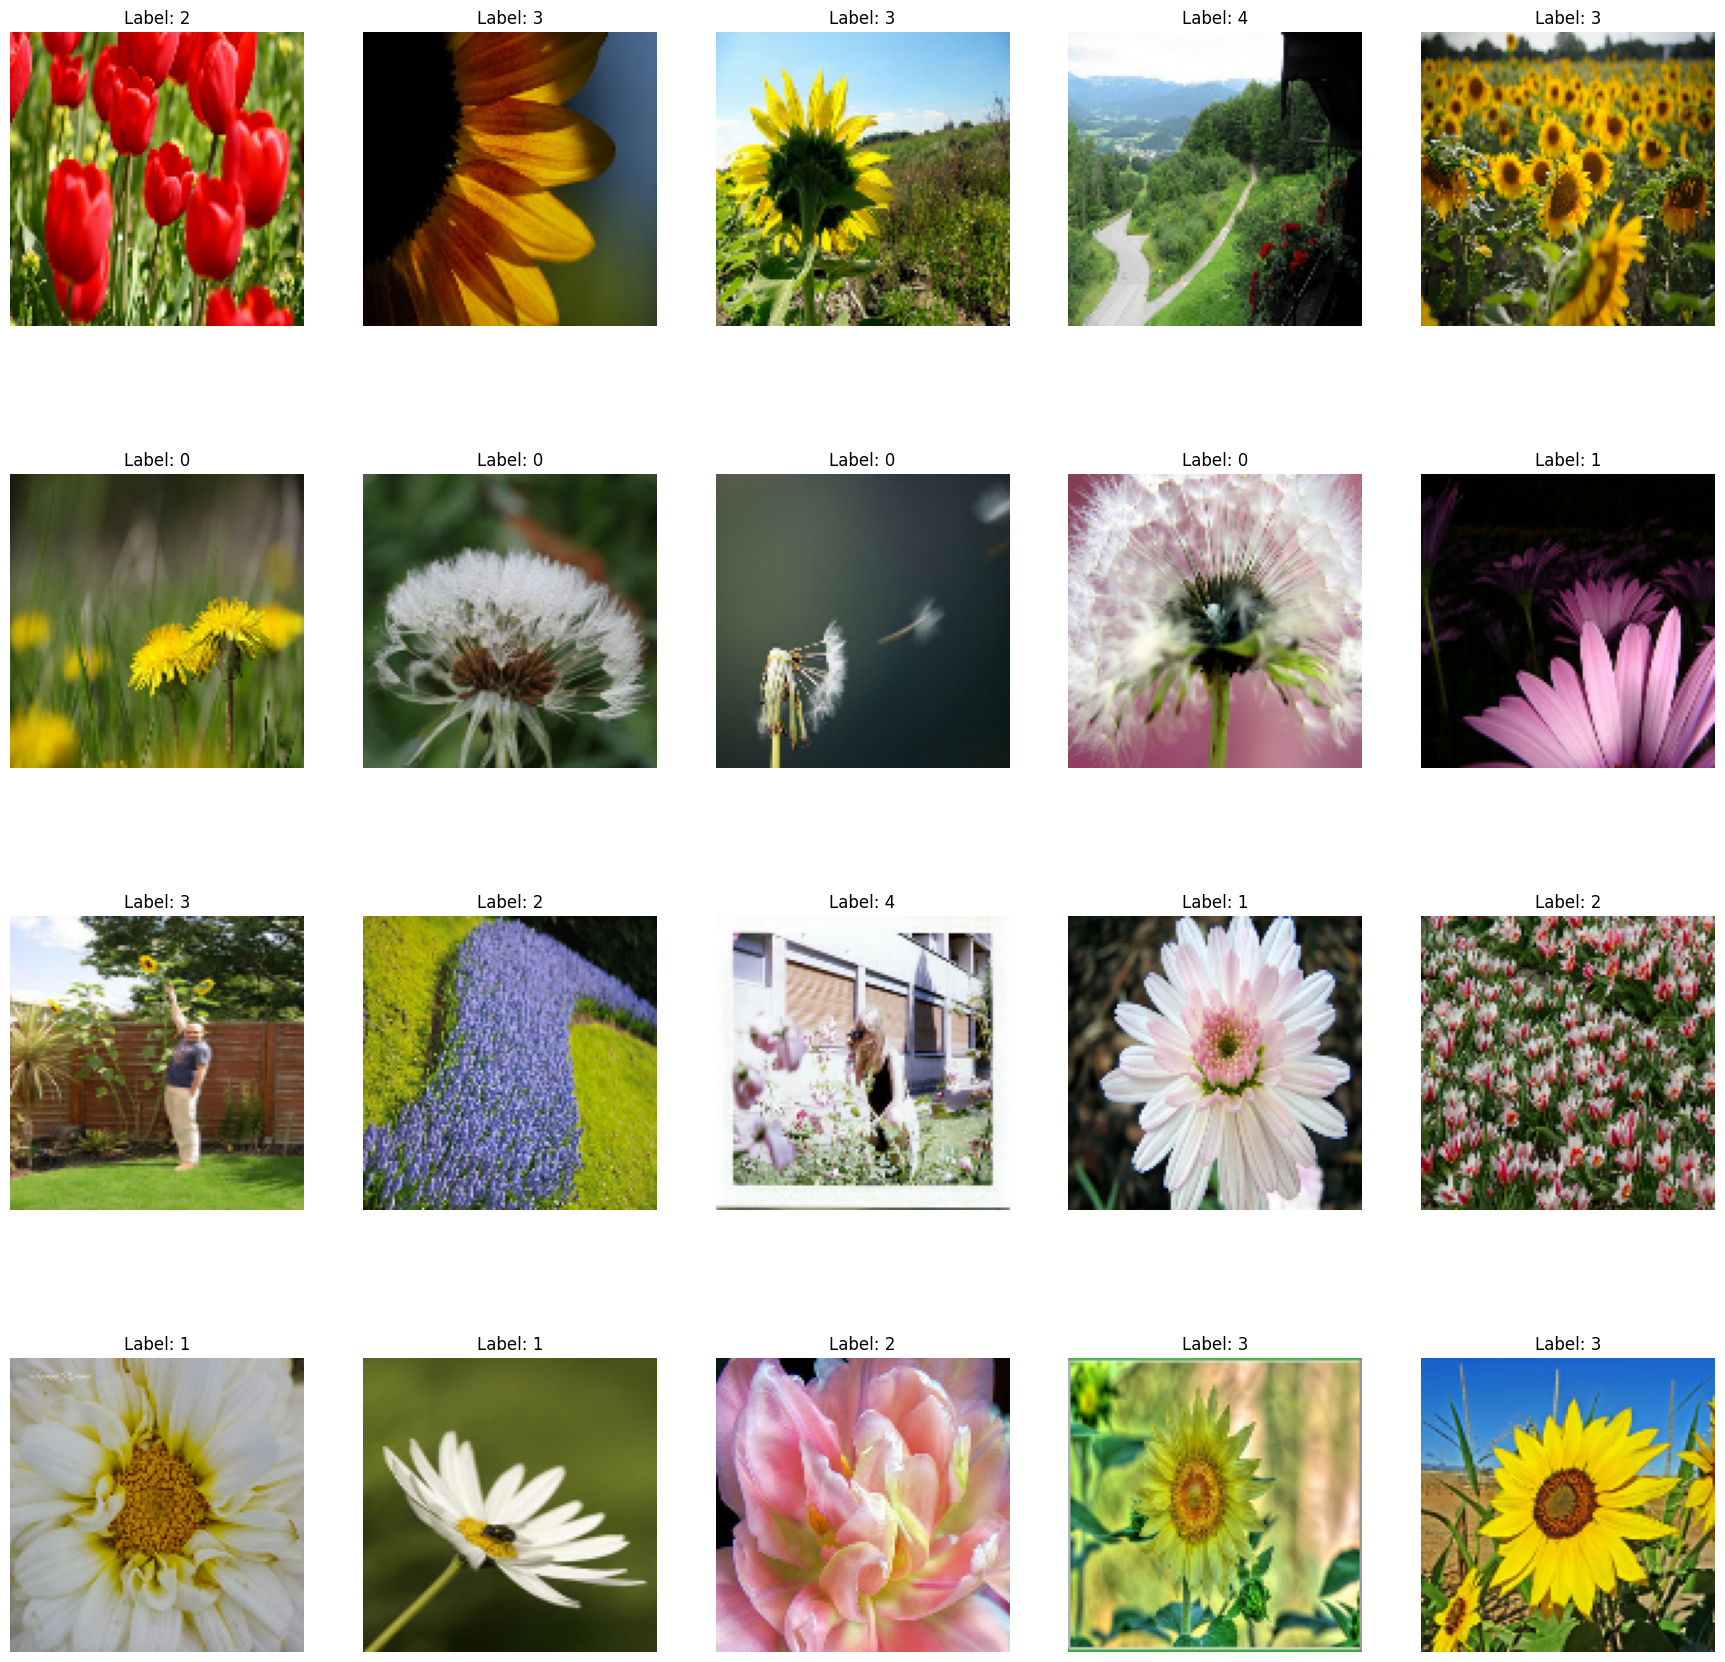

In [ ]:
view_image(ds_tf)